# Current temp(based on latest 1 month) & Predicting future temperature 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# List of files to process
files = [
    'Adyar.csv', 'AnnaNagar.csv', 'Tondiarpet.csv', 'Royapuram.csv', 'Kodambakkam.csv',
    'Alandur.csv', 'Perungudi.csv', 'valasaravakkam.csv', 'Manali.csv', 'Teynampet.csv',
    'Sholinganallur.csv', 'ThiruViKaNagar.csv', 'Ambattur.csv', 'madhavaram.csv'
]

# Initialize an empty list to store temperature data
temperature_data = []

# Function to get the 'temp' value from the last row of a file
def get_last_temp(file):
    # Load the dataset
    df = pd.read_csv(file)
    
    # Get the 'temp' value from the last row
    last_temp = df['temp'].iloc[-1]
    
    return last_temp

# Function to process a file, train model, and predict future temperature
def process_file(file_path):
    try:
        # Load the dataset
        data = pd.read_csv(file_path)
        
        # Ensure required columns are present
        required_columns = ['solarradiation', 'humidity', 'dew', 'tempmax', 'tempmin', 'cloudcover']
        if not all(col in data.columns for col in required_columns):
            raise ValueError("Some required columns are missing in the data.")
        
        # Handle small datasets
        if len(data) < 2:
            print(f"Not enough data in {file_path} after processing. Using default prediction.")
            default_temp = data['temp'].mean() if not data.empty else 'N/A'
            return {
                'File': file_path,
                'Current Temperature (°F)': default_temp,
                'Future Temperature (°F)': 'N/A'
            }
        
        # Prepare features and target variable
        X = data[required_columns]
        y = data['temp']
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Initialize and train the Random Forest model
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # Save the trained model to a file
        joblib.dump(rf_model, 'random_forest_temp_prediction_model.pkl')
        
        # Predict the temperature based on the latest available data
        latest_data = data.iloc[-1]  # Take the latest row
        latest_features = latest_data[required_columns]
        latest_features = [latest_features.values]  # Convert to 2D array for prediction
        
        # Make a single prediction for the latest data
        predicted_temp = rf_model.predict(latest_features)
        
        # Output results
        print(f'{file_path} - Current Temperature: {latest_data["temp"]:.2f}°F')
        print(f'{file_path} - Predicted Future Temperature: {predicted_temp[0]:.2f}°F')
         
        y_pred_test = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred_test)
        r2 = r2_score(y_test, y_pred_test)

        print(f'{file_path} - Mean Squared Error (MSE): {mse:.2f}')
        print(f'{file_path} - R-squared (R²): {r2:.2f}')
        
        return {
            'Area': file_path.split('.')[0],
            'Current Temperature (°F)': latest_data['temp'],
            'Future Temperature (°F)': predicted_temp[0]
        }
    
    except Exception as e:
        print(f"An error occurred with file {file_path}: {e}")
        return {
            'Area': file_path.split('.')[0],
            'Current Temperature (°F)': 'Error',
            'Future Temperature (°F)': 'Error'
        }

# Process each file and collect results
results = []
for file in files:
    result = process_file(file)
    results.append(result)

# Create a DataFrame from the collected data
results_df = pd.DataFrame(results)

# Save the DataFrame to a single CSV file
results_df.to_csv('temperature_predictions.csv', index=False)
print('All temperature data saved to temperature_predictions.csv')


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Adyar.csv - Current Temperature: 83.70°F
Adyar.csv - Predicted Future Temperature: 84.02°F
Adyar.csv - Mean Squared Error (MSE): 0.37
Adyar.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


AnnaNagar.csv - Current Temperature: 84.00°F
AnnaNagar.csv - Predicted Future Temperature: 84.35°F
AnnaNagar.csv - Mean Squared Error (MSE): 0.36
AnnaNagar.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Tondiarpet.csv - Current Temperature: 83.20°F
Tondiarpet.csv - Predicted Future Temperature: 83.52°F
Tondiarpet.csv - Mean Squared Error (MSE): 0.37
Tondiarpet.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Royapuram.csv - Current Temperature: 83.70°F
Royapuram.csv - Predicted Future Temperature: 84.13°F
Royapuram.csv - Mean Squared Error (MSE): 0.34
Royapuram.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Kodambakkam.csv - Current Temperature: 84.30°F
Kodambakkam.csv - Predicted Future Temperature: 84.44°F
Kodambakkam.csv - Mean Squared Error (MSE): 0.36
Kodambakkam.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Alandur.csv - Current Temperature: 83.80°F
Alandur.csv - Predicted Future Temperature: 84.00°F
Alandur.csv - Mean Squared Error (MSE): 0.38
Alandur.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Perungudi.csv - Current Temperature: 84.30°F
Perungudi.csv - Predicted Future Temperature: 84.46°F
Perungudi.csv - Mean Squared Error (MSE): 0.38
Perungudi.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


valasaravakkam.csv - Current Temperature: 84.30°F
valasaravakkam.csv - Predicted Future Temperature: 84.44°F
valasaravakkam.csv - Mean Squared Error (MSE): 0.39
valasaravakkam.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Manali.csv - Current Temperature: 50.50°F
Manali.csv - Predicted Future Temperature: 51.93°F
Manali.csv - Mean Squared Error (MSE): 2.13
Manali.csv - R-squared (R²): 0.99


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Teynampet.csv - Current Temperature: 83.70°F
Teynampet.csv - Predicted Future Temperature: 84.09°F
Teynampet.csv - Mean Squared Error (MSE): 0.36
Teynampet.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Sholinganallur.csv - Current Temperature: 84.30°F
Sholinganallur.csv - Predicted Future Temperature: 84.47°F
Sholinganallur.csv - Mean Squared Error (MSE): 0.38
Sholinganallur.csv - R-squared (R²): 0.97


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ThiruViKaNagar.csv - Current Temperature: 83.70°F
ThiruViKaNagar.csv - Predicted Future Temperature: 84.04°F
ThiruViKaNagar.csv - Mean Squared Error (MSE): 0.33
ThiruViKaNagar.csv - R-squared (R²): 0.98


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Ambattur.csv - Current Temperature: 83.70°F
Ambattur.csv - Predicted Future Temperature: 84.07°F
Ambattur.csv - Mean Squared Error (MSE): 0.34
Ambattur.csv - R-squared (R²): 0.97
madhavaram.csv - Current Temperature: 83.70°F
madhavaram.csv - Predicted Future Temperature: 84.10°F
madhavaram.csv - Mean Squared Error (MSE): 0.35
madhavaram.csv - R-squared (R²): 0.97
All temperature data saved to temperature_predictions.csv


C:\Users\Nafila Nazrin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Green area, Water bodies and Building density percentage for valasara, manali, Teynampet, sholin, thiru v ka, ambattur and madhavaram

In [2]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
from shapely.geometry import box

def fetch_data_from_bbox(bbox):
    try:
        # Convert bbox to a Polygon using shapely
        polygon = box(*bbox)
        
        # Debug print to verify bbox and polygon
        print(f"Fetching data within bbox: {bbox}")
        
        # Fetch data within the bounding box
        water_gdf = ox.features_from_polygon(polygon, tags={'natural': 'water'})
        green_gdf = ox.features_from_polygon(polygon, tags={'landuse': ['park', 'forest'], 'natural': ['wood']})
        buildings_gdf = ox.features_from_polygon(polygon, tags={'building': True})
        
        return water_gdf, green_gdf, buildings_gdf
    except Exception as e:
        print(f"Error fetching data from bbox: {e}")
        return gpd.GeoDataFrame(), gpd.GeoDataFrame(), gpd.GeoDataFrame()

def analyze_data(zone_name, bbox):
    print(f"Analyzing {zone_name}...")
    
    try:
        water_gdf, green_gdf, buildings_gdf = fetch_data_from_bbox(bbox)

        # Handle cases where no data is returned
        if water_gdf.empty and green_gdf.empty and buildings_gdf.empty:
            print(f"No data found for {zone_name}.")
            print(f"Water Bodies Percentage in {zone_name}: 0.00%")
            print(f"Green Area Percentage in {zone_name}: 0.00%")
            print(f"Building Density Percentage in {zone_name}: 0.00%")
            return

        # Combine all feature GeoDataFrames for total area calculation
        combined_gdf = gpd.GeoDataFrame(pd.concat([water_gdf, green_gdf, buildings_gdf], ignore_index=True))
        if combined_gdf.empty:
            print(f"Combined data is empty for {zone_name}.")
            print(f"Water Bodies Percentage in {zone_name}: 0.00%")
            print(f"Green Area Percentage in {zone_name}: 0.00%")
            print(f"Building Density Percentage in {zone_name}: 0.00%")
            return

        # Calculate total area of the zone
        total_area = combined_gdf.unary_union.area

        # Calculate areas for each feature
        water_area = water_gdf.area.sum() if not water_gdf.empty else 0
        green_area = green_gdf.area.sum() if not green_gdf.empty else 0
        building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0

        # Calculate percentages
        water_percentage = (water_area / total_area) * 100 if total_area > 0 else 0
        green_percentage = (green_area / total_area) * 100 if total_area > 0 else 0
        building_percentage = (building_area / total_area) * 100 if total_area > 0 else 0

        # Display percentage data
        print(f"{zone_name}:")
        print(f"  Water Bodies Percentage: {water_percentage:.2f}%")
        print(f"  Green Area Percentage: {green_percentage:.2f}%")
        print(f"  Building Density Percentage: {building_percentage:.2f}%")
        print()

    except Exception as e:
        print(f"Error analyzing {zone_name}: {e}")
        print(f"Water Bodies Percentage in {zone_name}: 0.00%")
        print(f"Green Area Percentage in {zone_name}: 0.00%")
        print(f"Building Density Percentage in {zone_name}: 0.00%")

# Define bounding boxes for the remaining zones
zones_bboxes = {
    "Valasaravakkam": [80.193, 13.0, 80.243, 13.05],
    "Manali": [80.200, 13.120, 80.240, 13.160],         
    "Teynampet": [80.235, 13.055, 80.265, 13.085],
    "Sholinganallur": [80.2079666627, 12.8521343241, 80.2634552773, 12.9587060909],  
    "Thiru. Vi. Ka. Nagar": [80.265, 13.065, 80.295, 13.095],
    "Ambattur": [80.185, 13.105, 80.215, 13.135],
    "Madhavaram": [80.237, 13.130, 80.267, 13.160]
}

# Analyze each zone with the defined bounding boxes
for zone_name, bbox in zones_bboxes.items():
    analyze_data(zone_name, bbox)


Analyzing Valasaravakkam...
Fetching data within bbox: [80.193, 13.0, 80.243, 13.05]


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:53: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Valasaravakkam:
  Water Bodies Percentage: 21.37%
  Green Area Percentage: 23.34%
  Building Density Percentage: 55.33%

Analyzing Manali...
Fetching data within bbox: [80.2, 13.12, 80.24, 13.16]


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:53: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Manali:
  Water Bodies Percentage: 32.75%
  Green Area Percentage: 1.28%
  Building Density Percentage: 66.00%

Analyzing Teynampet...
Fetching data within bbox: [80.235, 13.055, 80.265, 13.085]


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:53: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Teynampet:
  Water Bodies Percentage: 31.88%
  Green Area Percentage: 0.02%
  Building Density Percentage: 68.41%

Analyzing Sholinganallur...
Fetching data within bbox: [80.2079666627, 12.8521343241, 80.2634552773, 12.9587060909]


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:53: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Sholinganallur:
  Water Bodies Percentage: 63.03%
  Green Area Percentage: 0.01%
  Building Density Percentage: 37.27%

Analyzing Thiru. Vi. Ka. Nagar...
Fetching data within bbox: [80.265, 13.065, 80.295, 13.095]


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:53: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Thiru. Vi. Ka. Nagar:
  Water Bodies Percentage: 40.15%
  Green Area Percentage: 0.45%
  Building Density Percentage: 59.48%

Analyzing Ambattur...
Fetching data within bbox: [80.185, 13.105, 80.215, 13.135]


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:53: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Ambattur:
  Water Bodies Percentage: 64.67%
  Green Area Percentage: 1.27%
  Building Density Percentage: 34.12%

Analyzing Madhavaram...
Fetching data within bbox: [80.237, 13.13, 80.267, 13.16]
Madhavaram:
  Water Bodies Percentage: 61.34%
  Green Area Percentage: 1.55%
  Building Density Percentage: 37.11%



C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\1272364498.py:53: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


# Green area, Water bodies and Building density percentage for Adyar, anna nag, tondiar, roya, kodam, alandur, perungudi

In [3]:
import osmnx as ox
import geopandas as gpd
import pandas as pd

# Define zones with broader or alternative queries
zones = {
    "Adyar": "Adyar, Chennai, India",
    "Anna Nagar": "Anna Nagar, Chennai, India",
    "Tondiarpet": "Tondiarpet, Chennai, India",
    "Zone 5 Royapuram": "Zone 5 Royapuram, Chennai, India",
    "Kodambakkam": "Kodambakkam, Chennai, India",
    "Alandur": "Alandur, Chennai, India",
    "Perungudi": "Perungudi, Chennai, India"
}

def analyze_zone(zone_name, place_query):
    print(f"Analyzing {zone_name}...")
    
    try:
        # Fetch data using the updated OSMnx API
        water_gdf = ox.features_from_place(place_query, tags={'water': True})
        green_gdf = ox.features_from_place(place_query, tags={'landuse': ['park', 'forest'], 'natural': ['wood']})
        buildings_gdf = ox.features_from_place(place_query, tags={'building': True})

        # Handle cases where no data is returned
        if water_gdf.empty and green_gdf.empty and buildings_gdf.empty:
            print(f"No data found for {zone_name}.")
            return

        # Combine all feature GeoDataFrames for total area calculation
        combined_gdf = gpd.GeoDataFrame(pd.concat([water_gdf, green_gdf, buildings_gdf], ignore_index=True))
        if combined_gdf.empty:
            print(f"Combined data is empty for {zone_name}.")
            return

        # Calculate total area of the zone
        total_area = combined_gdf.unary_union.area

        # Calculate areas for each feature
        water_area = water_gdf.area.sum() if not water_gdf.empty else 0
        green_area = green_gdf.area.sum() if not green_gdf.empty else 0
        building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0

        # Calculate percentages
        water_percentage = (water_area / total_area) * 100 if total_area > 0 else 0
        green_percentage = (green_area / total_area) * 100 if total_area > 0 else 0
        building_percentage = (building_area / total_area) * 100 if total_area > 0 else 0

        # Display percentage data
        print(f"{zone_name}:")
        print(f"  Water Bodies Percentage: {water_percentage:.2f}%")
        print(f"  Green Area Percentage: {green_percentage:.2f}%")
        print(f"  Building Density Percentage: {building_percentage:.2f}%")
        print()

    except Exception as e:
        print(f"Error analyzing {zone_name}: {e}")

# Run analysis for each zone
for zone_name, place_query in zones.items():
    analyze_zone(zone_name, place_query)


Analyzing Adyar...


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Adyar:
  Water Bodies Percentage: 23.40%
  Green Area Percentage: 29.46%
  Building Density Percentage: 47.42%

Analyzing Anna Nagar...


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Anna Nagar:
  Water Bodies Percentage: 19.41%
  Green Area Percentage: 0.82%
  Building Density Percentage: 79.80%

Analyzing Tondiarpet...


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Tondiarpet:
  Water Bodies Percentage: 19.17%
  Green Area Percentage: 0.14%
  Building Density Percentage: 80.76%

Analyzing Zone 5 Royapuram...


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Zone 5 Royapuram:
  Water Bodies Percentage: 23.85%
  Green Area Percentage: 0.28%
  Building Density Percentage: 76.08%

Analyzing Kodambakkam...


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Kodambakkam:
  Water Bodies Percentage: 35.83%
  Green Area Percentage: 0.13%
  Building Density Percentage: 64.09%

Analyzing Alandur...


C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


Alandur:
  Water Bodies Percentage: 39.04%
  Green Area Percentage: 1.08%
  Building Density Percentage: 59.89%

Analyzing Perungudi...
Perungudi:
  Water Bodies Percentage: 48.71%
  Green Area Percentage: 0.01%
  Building Density Percentage: 51.35%



C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_area = water_gdf.area.sum() if not water_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_area = green_gdf.area.sum() if not green_gdf.empty else 0
C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_21248\641981345.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_area = buildings_gdf.area.sum() if not buildings_gdf.empty else 0


# UHI INDEX

In [9]:
import pandas as pd
temperature_predictions=pd.read_csv("temperature_predictions.csv")
print(temperature_predictions.head())

          Area  Current Temperature (°F)  Future Temperature (°F)
0        Adyar                      83.7                   84.021
1    AnnaNagar                      84.0                   84.355
2   Tondiarpet                      83.2                   83.518
3    Royapuram                      83.7                   84.135
4  Kodambakkam                      84.3                   84.442


In [3]:
import pandas as pd
temperature_predictions=pd.read_csv("temperature_predictions.csv")
temp = pd.Series(temperature_predictions['Current Temperature (°F)'])
future_temp=pd.Series(temperature_predictions["Future Temperature (°F)"])

# Sample data
data = {
    'zone': ['Adyar', 'Anna Nagar', 'Tondiarpet', 'Royapuram', 'Kodambakkam', 'Alandur', 'Perungudi', 'Valasaravakkam', 'Manali', 'Teynampet', 'Sholinganallur', 'Thiru. Vi. Ka. Nagar', 'Ambattur', 'Madhavaram'],
    'Current Temperature': [i for i in temp],
    'Future Temperature': [x for x in future_temp],
    'Water Bodies Percentage': [23.40, 19.41, 19.17, 23.85, 35.83, 39.04, 48.71, 21.37, 32.75, 31.88, 63.03, 40.15, 64.67, 61.34],
    'Green Area Percentage': [29.46, 0.82, 0.14, 0.28, 0.13, 1.08, 0.01, 23.34, 1.28, 0.02, 0.01, 0.45, 1.27, 1.55],
    'Building Density Percentage': [47.42, 79.80, 80.76, 76.08, 64.09, 59.89, 51.35, 55.33, 66.00, 68.41, 37.27, 59.48, 34.12, 37.11]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate temperature difference
df['Temp Difference'] = df['Future Temperature'] - df['Current Temperature']

# Normalize the factors (e.g., scaling between 0 and 1)
df['Norm Water Bodies'] = df['Water Bodies Percentage'] / df['Water Bodies Percentage'].max()
df['Norm Green Area'] = df['Green Area Percentage'] / df['Green Area Percentage'].max()
df['Norm Building Density'] = df['Building Density Percentage'] / df['Building Density Percentage'].max()

# Define weights for each factor
weight_water_bodies = -1  # Higher percentage of water bodies may reduce UHI
weight_green_area = -1    # Higher green area may reduce UHI
weight_building_density = 1  # Higher building density may increase UHI

# Calculate UHI Effect
df['UHI Effect'] = df['Temp Difference'] + (weight_water_bodies * df['Norm Water Bodies']) + \
                   (weight_green_area * df['Norm Green Area']) + \
                   (weight_building_density * df['Norm Building Density'])

# Display results
for index, row in df.iterrows():
    print(f"Zone: {row['zone']}, UHI Index: {row['UHI Effect']:.2f}")


Zone: Adyar, UHI Index: -0.45
Zone: Anna Nagar, UHI Index: 1.02
Zone: Tondiarpet, UHI Index: 1.02
Zone: Royapuram, UHI Index: 1.00
Zone: Kodambakkam, UHI Index: 0.38
Zone: Alandur, UHI Index: 0.31
Zone: Perungudi, UHI Index: 0.04
Zone: Valasaravakkam, UHI Index: -0.30
Zone: Manali, UHI Index: 1.70
Zone: Teynampet, UHI Index: 0.74
Zone: Sholinganallur, UHI Index: -0.35
Zone: Thiru. Vi. Ka. Nagar, UHI Index: 0.44
Zone: Ambattur, UHI Index: -0.25
Zone: Madhavaram, UHI Index: -0.15


In [4]:
uhi_values_df = df[['zone', 'Water Bodies Percentage', 'Green Area Percentage', 'Building Density Percentage', 'UHI Effect']]
uhi_values_df.to_csv('finaluhivalues.csv', index=False)

C:\Users\Nafila Nazrin\AppData\Local\Temp\ipykernel_15196\953579540.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zone', y='UHI Index', data=df, palette='coolwarm')


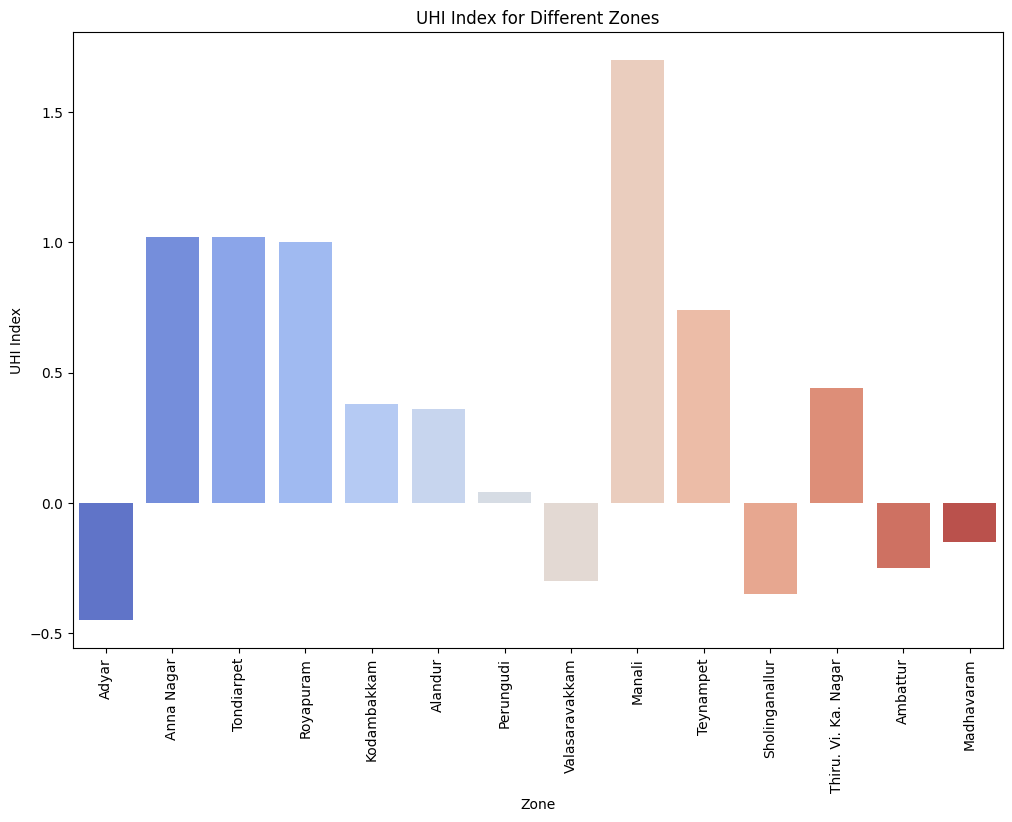

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for 14 zones
data = {
    'zone': ['Adyar', 'Anna Nagar', 'Tondiarpet', 'Royapuram', 'Kodambakkam', 'Alandur', 'Perungudi', 
             'Valasaravakkam', 'Manali', 'Teynampet', 'Sholinganallur', 'Thiru. Vi. Ka. Nagar', 
             'Ambattur', 'Madhavaram'],
    'UHI Index': [-0.45,1.02,1.02,1.00,0.38,0.36,0.04,-0.30,1.70,0.74,-0.35,0.44,-0.25,-0.15]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='zone', y='UHI Index', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('UHI Index for Different Zones')
plt.xlabel('Zone')
plt.ylabel('UHI Index')
plt.show()
